## Objective


### Predicting-University-Admissions

Using the supplied predictive variables (GRE score, TOEFL score, University Rating, etc) to predict the likelihood of admission of a new candidate.

### Evaluation Criteria

The best model should be the one that evaluates to have the lowest RMSE overall, and please indicate the error you get on validation set containing the last 100 observations.

### Expected Submission

Please submit a Kernel where the final cell outputs the RMSE score on the final 100 observations.

### Dataset

The dataset contains several arguments(basically the inputs you need to provide) which are considered for the application for Masters Programs. The parameters included are :

- `GRE Scores` ( out of 340 )

- `TOEFL Scores` ( out of 120 )

- `Under Grad University Rating` ( out of 5 ) 

- `Statement of Purpose` (out of 5 )

- `Letter of Recommendation Strength` ( out of 5 )

- `Undergraduate GPA` ( out of 10 ) 

- `Research Experience` ( either 0 or 1 )

- `Chance of Admit` ( ranging from 0 to 1 )

# Setup


## Importing the necessary libraries

First, let's make sure this notebook works well in both `python 2 and 3`, import a few common modules, ensure `MatplotLib plots` figures `inline` and prepare a `function` to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import pandas as pd  # data processing
import numpy as np   # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_IMAGE_ID = "images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, PROJECT_IMAGE_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# sns.set_style('darkgrid')
# from matplotlib import pyplot

# for advanced visualizations
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
!pip3 install --upgrade pip

Requirement already up-to-date: pip in c:\users\sillians\appdata\local\packages\pythonsoftwarefoundation.python.3.7_qbz5n2kfra8p0\localcache\local-packages\python37\site-packages (20.2.4)


# Get the data

### Here is the function to fetch the data:

In [3]:
import os
# import tarfile
from six.moves import urllib
#  data/Admission_Predict.csv

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/HamoyeHQ/01-University-Admissions/master/" 
DATA_PATH = os.path.join("data")
DATA_URL = DOWNLOAD_ROOT + "data/Admission_Predict_Ver1.1.csv"

def fetch_Admission_data(admission_url=DATA_URL, admission_path=DATA_PATH):
    os.makedirs(admission_path, exist_ok=True)
    csv_path = os.path.join(admission_path, "Admission_Predict_Ver1.1.csv")
    urllib.request.urlretrieve(admission_url, csv_path)
    admission_csv = pd.read_csv(csv_path)
#     admission_csv.extractall(path=admission_path)
#     admission_csv.close()

In [4]:
fetch_Admission_data()

In [5]:
import pandas as pd

def load_admission_data(admission_path=DATA_PATH):
    csv_path = os.path.join(admission_path, "Admission_Predict_Ver1.1.csv")
    return pd.read_csv(csv_path)

#### Take a Quick Look at the Data Structure
Let’s take a look at the top 10 rows using the DataFrame’s `head() method`

In [6]:
data = load_admission_data()
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [7]:
# Splitting into train and test
train = data.iloc[:400, :]
test = data.iloc[400:, :]
print(train.shape)
print(test.shape)

(400, 9)
(100, 9)


In [8]:
train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
test.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
400,401,304,100,2,3.5,3.0,8.22,0,0.63
401,402,315,105,2,3.0,3.0,8.34,0,0.66
402,403,324,109,3,3.5,3.0,8.94,1,0.78
403,404,330,116,4,4.0,3.5,9.23,1,0.91
404,405,311,101,3,2.0,2.5,7.64,1,0.62


In [10]:
# drop the Serial No from the training data
train = train.drop(['Serial No.'], axis=1)

In [11]:
# drop the Serial No feature from the testing data
test = test.drop(['Serial No.'], axis=1)

In [12]:
train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

C:\Users\Sillians\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



GRE Score
TOEFL Score
Statement od Purpose
Letter of Recommendation
CGPA
Chance of Admission


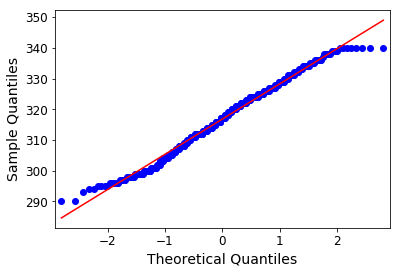

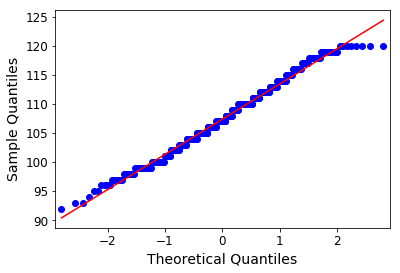

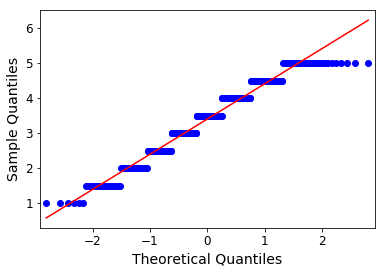

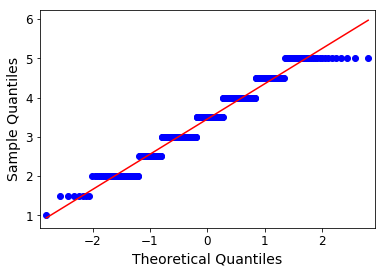

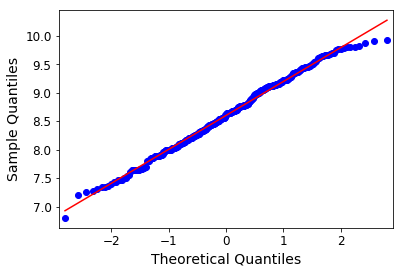

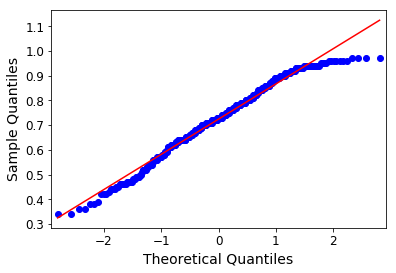

In [13]:
# showing qqplots for normality
import statsmodels.api as sm
import pylab
print('GRE Score')
sm.qqplot(train['GRE Score'], line='s')
print('TOEFL Score')
sm.qqplot(train['TOEFL Score'], line='s')
print('Statement od Purpose')
sm.qqplot(train['SOP'], line='s')
print('Letter of Recommendation')
sm.qqplot(train['LOR '], line='s')
print('CGPA')
sm.qqplot(train['CGPA'], line='s')
print('Chance of Admission')
sm.qqplot(train['Chance of Admit '], line='s')
pylab.show()

### scipy.stats.kstest

- Performs the (one sample or two samples) `Kolmogorov-Smirnov` test for goodness of fit.

- The one-sample test performs a test of the distribution `F(x)` of an observed random variable against a given distribution `G(x)`. Under the `null hypothesis`, the two distributions are identical, `F(x)=G(x)`. The `alternative hypothesis` can be either ‘two-sided’ (default), ‘less’ or ‘greater’. The KS test is only valid for continuous distributions. The two-sample test tests whether the two independent samples are drawn from the same continuous distribution.

In [14]:
# feature_list

In [15]:
#Kolmogorov Smirnov Test for Normality
from scipy.stats import kstest

feature_list = list(train.columns)
for feature in feature_list:
    output = kstest(train[feature], 'norm', N=100)
    print(f'Kolmogorov Test for {feature} = {output}')

Kolmogorov Test for GRE Score = KstestResult(statistic=1.0, pvalue=0.0)
Kolmogorov Test for TOEFL Score = KstestResult(statistic=1.0, pvalue=0.0)
Kolmogorov Test for University Rating = KstestResult(statistic=0.9122498680518207, pvalue=0.0)
Kolmogorov Test for SOP = KstestResult(statistic=0.9181927987311419, pvalue=0.0)
Kolmogorov Test for LOR  = KstestResult(statistic=0.9572498680518208, pvalue=0.0)
Kolmogorov Test for CGPA = KstestResult(statistic=0.9999999999947691, pvalue=0.0)
Kolmogorov Test for Research = KstestResult(statistic=0.5, pvalue=5.390131481240781e-93)
Kolmogorov Test for Chance of Admit  = KstestResult(statistic=0.6452572731517505, pvalue=7.148882731189418e-163)


### scipy.stats import normaltest

- Test whether a sample differs from a `normal distribution`. This function tests the `null hypothesis` that a sample comes from a `normal distribution`. It is based on `D’Agostino` and `Pearson’s test` that combines `skew` and `kurtosis` to produce an `omnibus test of normality`.

In [16]:
# Test for normality
from scipy.stats import normaltest

feature_list = list(train.columns)
for feature in feature_list:
    output, p = normaltest(train[feature])
    print(f'p-value for normal test for {feature} = {p}')

p-value for normal test for GRE Score = 4.714531292500165e-05
p-value for normal test for TOEFL Score = 0.003945790155853822
p-value for normal test for University Rating = 8.481821275449478e-08
p-value for normal test for SOP = 1.2935069117407045e-05
p-value for normal test for LOR  = 0.0001848420027465647
p-value for normal test for CGPA = 0.052520729609327604
p-value for normal test for Research = 0.0
p-value for normal test for Chance of Admit  = 0.0028666562891090314


In [17]:
# pick up the categorical data
cat_df = train[['University Rating', 'Research', 'Chance of Admit ']]

# drop categorical data to pick numerical data
num_df = train.drop(['University Rating', 'Research', 'Chance of Admit '], axis=1)

In [18]:
# Do same thing for the test data
cat_test_df = test[['University Rating', 'Research', 'Chance of Admit ']].reset_index(drop=True)
num_test_df = test.drop(['University Rating', 'Research', 'Chance of Admit '], axis=1)

In [19]:
#  shape of the categorical data
cat_test_df.shape

(100, 3)

In [20]:
# shape of the numerical data
num_test_df.shape

(100, 5)

### PowerTransformer

- Apply a power transform featurewise to make data more Gaussian-like. Power transforms are a family of `parametric`, `monotonic transformations` that are applied to make data more `Gaussian-like`. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

- Currently, PowerTransformer supports the `Box-Cox transform` and the `Yeo-Johnson transform`. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

- `Box-Cox` requires input data to be strictly positive, while `Yeo-Johnson` supports both positive or negative data.

- By default, `zero-mean`, `unit-variance normalization` is applied to the transformed data.

In [21]:
from sklearn.preprocessing import PowerTransformer # import powertransformer library
pt = PowerTransformer(method='box-cox')  # initialize the library
# pt.fit(num_df)
train_num_trans = pt.fit_transform(num_df)  # fit and transform on the training numerical data
test_num_trans = pt.fit_transform(num_test_df)  # fit and transform on the testing numerical data

In [22]:
train_num_trans_df = pd.DataFrame(train_num_trans, columns=num_df.columns)  # Add column names to the train data
test_num_trans_df = pd.DataFrame(test_num_trans, columns=num_df.columns)    # Add column names to the test data

In [23]:
train_df = pd.concat([cat_df, train_num_trans_df], axis=1) # concat with the categorical data for the train data
test_df = pd.concat([cat_test_df, test_num_trans_df], axis=1)  # concat with the categorical data for the test data

In [24]:
print(train_df.shape)  # print shape
print(test_df.shape)   # print shape

(400, 8)
(100, 8)


In [25]:
test_df.tail() # print last 5 rows of the test data

,University Rating,Research,Chance of Admit,GRE Score,TOEFL Score,SOP,LOR,CGPA
95,5,1,0.87,1.609810,0.343800,1.333065,0.343861,0.861332
96,5,1,0.96,2.082851,1.647499,1.865700,1.440195,2.054571
97,5,1,0.93,1.420202,2.029011,1.333065,1.440195,1.633787
98,4,0,0.73,-0.296651,-0.503569,0.797170,1.440195,-0.046885
99,4,0,0.84,1.135366,1.099665,1.333065,0.880342,0.890895


In [26]:
train_df.head()  # print first 5 rows of the train data

,University Rating,Research,Chance of Admit,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,4,1,0.92,1.789413,1.718552,1.114575,1.172165,1.789231
1,4,1,0.76,0.620599,-0.053072,0.580393,1.172165,0.446813
2,3,1,0.72,-0.082899,-0.552429,-0.437371,0.044416,-1.006434
3,3,1,0.80,0.443592,0.439093,0.062500,-1.062535,0.108515
4,2,0,0.65,-0.256882,-0.720535,-1.373337,-0.512037,-0.660067


In [27]:
train_df['Chance of Admit '].describe()   # statistics inference from the Chance of Admit feature

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit , dtype: float64

## Modelling

In [28]:
from sklearn.model_selection import KFold  # K-Folds cross-validator
from sklearn.metrics import mean_squared_error  # Evaluation metrics
from sklearn.linear_model import LinearRegression, BayesianRidge, HuberRegressor, RANSACRegressor, Lasso, Ridge, ElasticNet

In [29]:
#creating dummy variables for University Rating and Research
train_df = pd.get_dummies(train_df, columns=['University Rating', 'Research'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['University Rating', 'Research'], drop_first=True)

In [30]:
train_df.head()

,Chance of Admit,GRE Score,TOEFL Score,SOP,LOR,CGPA,University Rating_2,University Rating_3,University Rating_4,University Rating_5,Research_1
0,0.92,1.789413,1.718552,1.114575,1.172165,1.789231,0,0,1,0,1
1,0.76,0.620599,-0.053072,0.580393,1.172165,0.446813,0,0,1,0,1
2,0.72,-0.082899,-0.552429,-0.437371,0.044416,-1.006434,0,1,0,0,1
3,0.80,0.443592,0.439093,0.062500,-1.062535,0.108515,0,1,0,0,1
4,0.65,-0.256882,-0.720535,-1.373337,-0.512037,-0.660067,1,0,0,0,0


In [31]:
## Transforming our target 
from scipy.stats import boxcox   # Return a dataset transformed by a Box-Cox power transforma
train_df['Chance of Admit '], lambd = boxcox(train_df['Chance of Admit '])

In [32]:
test_df['Chance of Admit '] = boxcox(test_df['Chance of Admit '], lmbda=lambd) 

In [33]:
# Splitting into features and Targets
# The test set is isolated for final evaluation
X = train_df.drop(['Chance of Admit '], axis=1)
y = train_df['Chance of Admit ']

## Linear Models
#### I ran multiple linear models using 10 fold cross validation to see how each performed

Click the link for detailed explanation of Cross validation <a id='https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation%22%3ECross'>Cross Validation in details</a>

The K-Fold cross validation in details <a id='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html'>K Fold cross-validator</a>

### The use of Cross Validation

- Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. 


- When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set. 


- However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.


- A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets


- The following procedure is followed for each of the k “folds”:

    - A model is trained using **k - 1** of the folds as training data;
    
    - the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
    
    
- The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

In [50]:
fold = KFold(n_splits=10, random_state=2020, shuffle=True)
from sklearn.metrics import r2_score

rmse_list = []
f_num = 0
cof_det = []

for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model= LinearRegression()  # Instantiate the Linear regression model
    model.fit(x_train, y_train)
    p_val = model.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1
#     check for coefficient of determination score
    score = r2_score(y_val.values.reshape(-1,1), p_val)
    cof_det.append(score)
    
print(f'Mean RMSE Value for LinearRegression = {np.mean(rmse_list)}')
print(f'Coefficient of Determination = {np.mean(np.round((cof_det), 2))}')

Mean RMSE Value for LinearRegression = 0.04804980878644252
Coefficient of Determination = 0.818


In [52]:
# Read more on BayesianRidge Regressor https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression

rmse_list = []
cof_det = []
for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model2= BayesianRidge()
    model2.fit(x_train, y_train)
    p_val = model2.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1
#     check for coefficient of determination score
    score = r2_score(y_val.values.reshape(-1,1), p_val)
    cof_det.append(score)
    
print(f'Mean RMSE Value for BayesianRidge = {np.mean(rmse_list)}')
print(f'Coefficient of Determination = {np.mean(np.round((cof_det), 2))}')

Mean RMSE Value for BayesianRidge = 0.04795102853202187
Coefficient of Determination = 0.819


In [57]:
# Read more on HuberRegressor   https://scikit-learn.org/stable/modules/linear_model.html#huber-regression
 
rmse_list = []
cof_det = []

for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model2= HuberRegressor(max_iter=2000)
    model2.fit(x_train, y_train)
    p_val = model2.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1
#     check for coefficient of determination score
    score = r2_score(y_val.values.reshape(-1,1), p_val)
    cof_det.append(score)

print(f'Mean RMSE Value for Huber Regressor= {np.mean(rmse_list)}')
print(f'Coefficient of Determination = {np.mean(np.round((cof_det), 2))}')

Mean RMSE Value for Huber Regressor= 0.04813133929895365
Coefficient of Determination = 0.8160000000000001


In [58]:
# Read more on RANSACRegressor  
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html?highlight=ransacregressor#sklearn.linear_model.RANSACRegressor
# https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression
# RANSAC (RANdom SAmple Consensus) algorithm.
rmse_list = []
cof_det = []

for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model2= RANSACRegressor(loss='squared_loss', random_state=42)
    model2.fit(x_train, y_train)
    p_val = model2.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1
#     check for coefficient of determination score
    score = r2_score(y_val.values.reshape(-1,1), p_val)
    cof_det.append(score)

print(f'Mean RMSE Value for RANSACRegressor = {np.mean(rmse_list)}')
print(f'Coefficient of Determination = {np.mean(np.round((cof_det), 2))}')

Mean RMSE Value for RANSACRegressor = 0.04798723613106889
Coefficient of Determination = 0.818


In [59]:
# Read more on how to implement Ridge 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge
# https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
rmse_list = []
cof_det = []

for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model2= Ridge(alpha=0.0001)
    model2.fit(x_train, y_train)
    p_val = model2.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1
#     check for coefficient of determination score
    score = r2_score(y_val.values.reshape(-1,1), p_val)
    cof_det.append(score)


print(f'Mean RMSE Value for Ridge = {np.mean(rmse_list)}')
print(f'Coefficient of Determination = {np.mean(np.round((cof_det), 2))}')

Mean RMSE Value for Ridge = 0.04804980465031069
Coefficient of Determination = 0.818


In [60]:
# Read more on how to implement Lasso
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso
# https://scikit-learn.org/stable/modules/linear_model.html#lasso

rmse_list = []
cof_det = []

for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model2= Lasso(alpha=0.0001)
    model2.fit(x_train, y_train)
    p_val = model2.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1
#     check for coefficient of determination score
    score = r2_score(y_val.values.reshape(-1,1), p_val)
    cof_det.append(score)

print(f'Mean RMSE Value for Lasso = {np.mean(rmse_list)}')
print(f'Coefficient of Determination = {np.mean(np.round((cof_det), 2))}')

Mean RMSE Value for Lasso = 0.04803302240801192
Coefficient of Determination = 0.819


## Tree Based Model

In [62]:
from xgboost import XGBRegressor

Example on Kaggle for implementing XGBRegressor with gridsearchcv <a href='https://www.kaggle.com/jayatou/xgbregressor-with-gridsearchcv'>XGB Regressor with Gridsearch cv</a>

<a href="https://www.kaggle.com/gayathrydasika/xgb-regressor-basic">Basic XGB Regressor on kaggle</a>

In [63]:
rmse_list = []
cof_det = []

for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    my_mod = XGBRegressor(max_depth = 1, n_estimators = 500, min_child_weight = 7, objective='reg:squarederror')
    my_mod.fit(x_train, y_train)
    p_val = my_mod.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1

#     check for coefficient of determination score
    score = r2_score(y_val.values.reshape(-1,1), p_val)
    cof_det.append(score)

print(f'Mean RMSE Value for XGB = {np.mean(rmse_list)}')
print(f'Coefficient of Determination = {np.mean(np.round((cof_det), 2))}')

Mean RMSE Value for XGB = 0.051517453066386276
Coefficient of Determination = 0.7899999999999999


### To perform gridsearch  

Read how to implement GridSearch Cross validation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearch CV</a>

Indept knowledge of Tuning the hyper parmeters of an estimator <a href="https://scikit-learn.org/stable/modules/grid_search.html#grid-search">hyper-parameter tuning </a>

In [64]:
X_c = X.copy()
Y_c = y.copy()

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_c, Y_c, test_size=0.2, random_state=42)

In [65]:
from sklearn.model_selection import GridSearchCV
params = {"min_child_weight" : list(range(10)),
         "max_depth" : list(range(1, 6))}
search = GridSearchCV(my_mod, param_grid = params, cv = 3, n_jobs = -1).fit(xtrain, ytrain)

In [66]:
search.best_params_

{'max_depth': 1, 'min_child_weight': 0}

##### Based on the models considered, Bayesian Ridge model has the lowest RMSE of 0.04795

## Training on whole data

In [67]:
main_model = BayesianRidge()
main_model.fit(X,y)

BayesianRidge()

In [68]:
final_pred = main_model.predict(test_df.drop(['Chance of Admit '], axis=1))
final_rmse = np.sqrt(mean_squared_error(test_df['Chance of Admit '], final_pred))
print(f'RMSE on test data = {final_rmse}')

RMSE on test data = 0.0349147312716883


In [69]:
final_pred

array([-0.32738091, -0.2845625 , -0.1886431 , -0.12607099, -0.35163701,
       -0.40383735, -0.28553763, -0.3251163 , -0.34993252, -0.35232781,
       -0.37873105, -0.35873097, -0.32051853, -0.32020486, -0.21810164,
       -0.17652112, -0.31395138, -0.36021095, -0.29185372, -0.30922452,
       -0.40861376, -0.16241649, -0.17824132, -0.04779657, -0.07853854,
       -0.05926405, -0.23397076, -0.22487999, -0.23116783, -0.09153291,
       -0.28405419, -0.19536292, -0.13766808, -0.21080249, -0.31469603,
       -0.33933415, -0.33764571, -0.30215021, -0.21074919, -0.27877061,
       -0.37222199, -0.18034091, -0.09274208, -0.11655213, -0.09830407,
       -0.09869926, -0.06978577, -0.16359077, -0.20777576, -0.20603958,
       -0.16416144, -0.12500222, -0.10167497, -0.2116724 , -0.31477361,
       -0.37967667, -0.37925229, -0.41190995, -0.25552201, -0.12418964,
       -0.19961695, -0.32626669, -0.32470106, -0.33909882, -0.44245419,
       -0.30280342, -0.21903254, -0.1758133 , -0.15406708, -0.14

In [70]:
## Rescaling our target variable
# Compute the inverse of the Box-Cox transformation.
from scipy.special import inv_boxcox
final_pred_inverse = inv_boxcox(final_pred, lambd)

In [71]:
final_pred_inverse

array([0.62777802, 0.68325759, 0.79856846, 0.86853585, 0.59497835,
       0.52028319, 0.68202524, 0.63078647, 0.59731906, 0.59402808,
       0.5569757 , 0.58517509, 0.63686756, 0.63728113, 0.76429968,
       0.81240985, 0.64549216, 0.58311718, 0.67400968, 0.65165641,
       0.51312264, 0.82833532, 0.81045449, 0.95147694, 0.9194509 ,
       0.93960884, 0.74544389, 0.75628088, 0.74879548, 0.90570673,
       0.68389945, 0.79083178, 0.85583478, 0.77287728, 0.64451777,
       0.61174937, 0.614029  , 0.66081578, 0.7729397 , 0.69054944,
       0.56624757, 0.80806395, 0.90442129, 0.87887632, 0.89849397,
       0.89807192, 0.92863811, 0.82701663, 0.77641705, 0.77844307,
       0.82637533, 0.86970062, 0.89488997, 0.77185808, 0.64441621,
       0.55562083, 0.55622912, 0.50814525, 0.71935744, 0.87058554,
       0.78590996, 0.62925934, 0.63133716, 0.61206741, 0.46049673,
       0.65997331, 0.76320148, 0.81321359, 0.83767465, 0.85079658,
       0.86780236, 0.66133232, 0.90082668, 0.66251458, 0.65140

In [72]:
## checking rmse between target variable in main scale
main_test_rmse = np.sqrt(mean_squared_error(test['Chance of Admit '], final_pred_inverse))
print(f'Final RMSE value on test data = {main_test_rmse}')

Final RMSE value on test data = 0.04577250997412102


#### Creating a dataframe to show coefficients of features in our model

In [73]:
main_model.intercept_

-0.2497700958644695

In [74]:
weights = list(main_model.coef_)
# weights

In [75]:
weights.insert(0, main_model.intercept_)

In [76]:
test_df.drop(['Chance of Admit '], axis=1).columns

Index(['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA',
       'University Rating_2', 'University Rating_3', 'University Rating_4',
       'University Rating_5', 'Research_1'],
      dtype='object')

In [77]:
weights_df = pd.DataFrame({'Features':['Intercept','GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA',
                                       'University Rating_2', 'University Rating_3', 'University Rating_4',
                                       'University Rating_5', 'Research_1'], 'Coefficients':weights})

In [78]:
weights_df.T

,0,1,2,3,4,5,6,7,8,9,10
Features,Intercept,GRE Score,TOEFL Score,SOP,LOR,CGPA,University Rating_2,University Rating_3,University Rating_4,University Rating_5,Research_1
Coefficients,-0.24977,0.0171074,0.0155085,-0.000227392,0.0151212,0.053527,-0.0122073,-0.0106045,-0.00347965,0.014631,0.0195838
